<a href="https://colab.research.google.com/github/LaXnZ/enhancing-sbmm-in-competitive-games/blob/model-comparison/Model_Comparison_with_Original_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common Code Part

## 1.1 Mount Google Drive and Load the Dataset

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
import pandas as pd
file_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/StarCraft II Replay Analysis.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


## 1.2 Data Preprocessing and Feature Engineering

In [ ]:
# Inspect the dataset
df.info()
df.describe()

# Handle missing data (fill missing values with the mean of the columns)
df.fillna(df.mean(), inplace=True)

# Feature engineering: Create Hotkey Efficiency
df['HotkeyEfficiency'] = df['SelectByHotkeys'] / df['AssignToHotkeys']

# Label Encoding for LeagueIndex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['LeagueIndex'] = le.fit_transform(df['LeagueIndex'])

# Split features and target
X = df.drop(columns=['LeagueIndex'])
y = df['LeagueIndex']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   float64
 6   SelectByHotkeys     3395 non-null   float64
 7   AssignToHotkeys     3395 non-null   float64
 8   UniqueHotkeys       3395 non-null   float64
 9   MinimapAttacks      3395 non-null   float64
 10  MinimapRightClicks  3395 non-null   float64
 11  NumberOfPACs        3395 non-null   float64
 12  GapBetweenPACs      3395 non-null   float64
 13  ActionLatency       3395 non-null   float64
 14  ActionsInPAC        3395 non-null   float64
 15  TotalMapExplored    3395 non-null   float64
 16  Worker

In [ ]:
print(df.head())

   GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0      52            4  27.0          10.0      3000.0  143.7180   
1      55            4  23.0          10.0      5000.0  129.2322   
2      56            3  30.0          10.0       200.0   69.9612   
3      57            2  19.0          20.0       400.0  107.6016   
4      58            2  32.0          10.0       500.0  122.8908   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0         0.003515         0.000220       0.000055        0.000110  ...   
1         0.003304         0.000259       0.000069        0.000294  ...   
2         0.001101         0.000336       0.000042        0.000294  ...   
3         0.001034         0.000213       0.000011        0.000053  ...   
4         0.001136         0.000327       0.000039        0.000000  ...   

   GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  WorkersMade  \
0         32.6677        40.8673        4.7508          0.0

# Model: Random Forest Classifier

## 2.1 Model Training

In [ ]:
def train_model(model, X_train, y_train):
    """Train a given model on the training data."""
    model.fit(X_train, y_train)
    return model

# Random Forest model training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = train_model(rf_model, X_train, y_train)

## 2.2 Model Evaluation

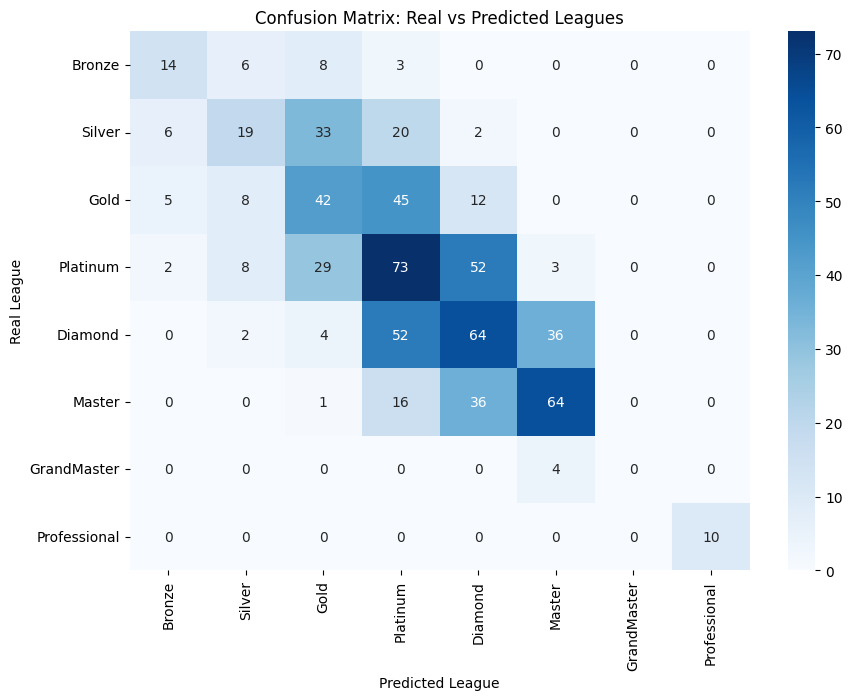

Accuracy: 0.4212076583210604
              precision    recall  f1-score   support

           0       0.52      0.45      0.48        31
           1       0.44      0.24      0.31        80
           2       0.36      0.38      0.37       112
           3       0.35      0.44      0.39       167
           4       0.39      0.41      0.40       158
           5       0.60      0.55      0.57       117
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00        10

    accuracy                           0.42       679
   macro avg       0.46      0.43      0.44       679
weighted avg       0.43      0.42      0.42       679



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluation and Visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and plots confusion matrix."""
    # Make predictions
    y_pred = model.predict(X_test)

    # Map league labels to league names
    league_mapping = {
        0: 'Bronze', 1: 'Silver', 2: 'Gold', 3: 'Platinum',
        4: 'Diamond', 5: 'Master', 6: 'GrandMaster', 7: 'Professional'
    }

    # Convert predictions and real values to league names
    y_test_leagues = [league_mapping[league] for league in y_test]
    y_pred_leagues = [league_mapping[league] for league in y_pred]

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_leagues, y_pred_leagues, labels=list(league_mapping.values()))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(league_mapping.values()), yticklabels=list(league_mapping.values()))
    plt.xlabel('Predicted League')
    plt.ylabel('Real League')
    plt.title('Confusion Matrix: Real vs Predicted Leagues')
    plt.show()

    # Print accuracy and classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Evaluate the trained model
evaluate_model(rf_model, X_test, y_test)

## 2.3 Model Tuning

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


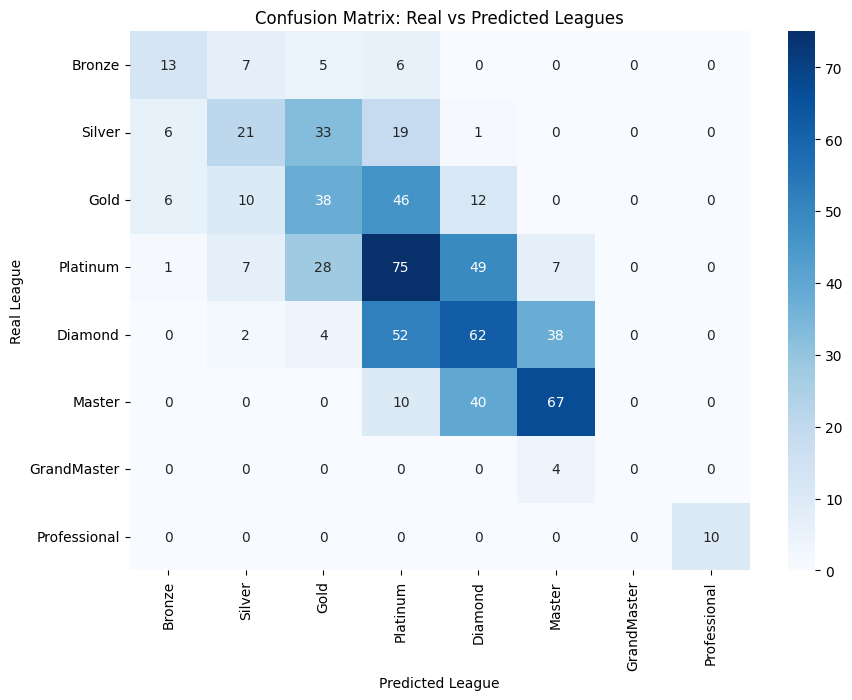

Accuracy: 0.4212076583210604
              precision    recall  f1-score   support

           0       0.50      0.42      0.46        31
           1       0.45      0.26      0.33        80
           2       0.35      0.34      0.35       112
           3       0.36      0.45      0.40       167
           4       0.38      0.39      0.39       158
           5       0.58      0.57      0.58       117
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00        10

    accuracy                           0.42       679
   macro avg       0.45      0.43      0.44       679
weighted avg       0.42      0.42      0.42       679



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Model tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def tune_model(model, param_grid, X_train, y_train):
    """Tune the model using GridSearchCV and return the best model."""
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)  # n_jobs=-1 uses all processors
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Expanded hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Test more number of trees
    'max_depth': [10, 20, 30, None],  # None for no depth limit
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using the expanded grid
best_rf_model = tune_model(rf_model, param_grid, X_train, y_train)

# Evaluate the tuned model
evaluate_model(best_rf_model, X_test, y_test)

# Model: Decision Tree Classifier

## 3.1 Model Training

In [ ]:
# Import the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Define the function to train the model
def train_model(model, X_train, y_train):
    """Train a given model on the training data."""
    model.fit(X_train, y_train)
    return model

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model = train_model(dt_model, X_train, y_train)

## 3.2 Model Evaluation

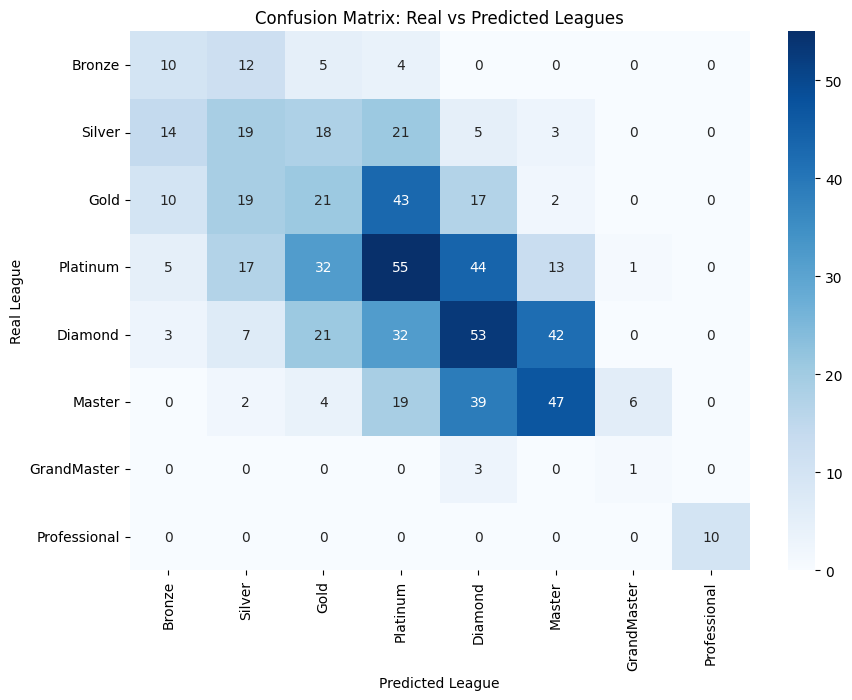

Accuracy: 0.3181148748159057
              precision    recall  f1-score   support

           0       0.24      0.32      0.27        31
           1       0.25      0.24      0.24        80
           2       0.21      0.19      0.20       112
           3       0.32      0.33      0.32       167
           4       0.33      0.34      0.33       158
           5       0.44      0.40      0.42       117
           6       0.12      0.25      0.17         4
           7       1.00      1.00      1.00        10

    accuracy                           0.32       679
   macro avg       0.36      0.38      0.37       679
weighted avg       0.32      0.32      0.32       679



In [ ]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate and visualize the model's performance
def evaluate_model(model, X_test, y_test):
    """Evaluates the model and plots confusion matrix."""
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # League name mapping (as before)
    league_mapping = {
        0: 'Bronze', 1: 'Silver', 2: 'Gold', 3: 'Platinum',
        4: 'Diamond', 5: 'Master', 6: 'GrandMaster', 7: 'Professional'
    }

    # Convert predictions and real values to league names
    y_test_leagues = [league_mapping[league] for league in y_test]
    y_pred_leagues = [league_mapping[league] for league in y_pred]

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_leagues, y_pred_leagues, labels=list(league_mapping.values()))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(league_mapping.values()), yticklabels=list(league_mapping.values()))
    plt.xlabel('Predicted League')
    plt.ylabel('Real League')
    plt.title('Confusion Matrix: Real vs Predicted Leagues')
    plt.show()

    # Print accuracy and classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Evaluate the trained Decision Tree model
evaluate_model(dt_model, X_test, y_test)

## 3.3 Model Tuning

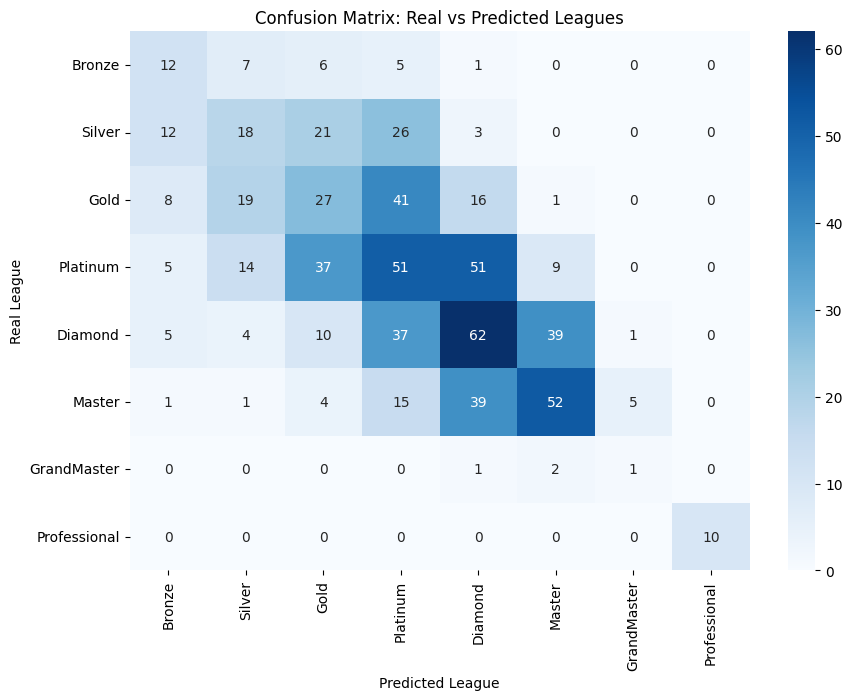

Accuracy: 0.3431516936671576
              precision    recall  f1-score   support

           0       0.28      0.39      0.32        31
           1       0.29      0.23      0.25        80
           2       0.26      0.24      0.25       112
           3       0.29      0.31      0.30       167
           4       0.36      0.39      0.37       158
           5       0.50      0.44      0.47       117
           6       0.14      0.25      0.18         4
           7       1.00      1.00      1.00        10

    accuracy                           0.34       679
   macro avg       0.39      0.41      0.39       679
weighted avg       0.35      0.34      0.34       679



In [ ]:
# Model tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

def tune_model(model, param_grid, X_train, y_train):
    """Tune the model using GridSearchCV and return the best model."""
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Define the parameter grid for tuning Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, 20],  # Control the depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform hyperparameter tuning
best_dt_model = tune_model(DecisionTreeClassifier(random_state=42), param_grid, X_train, y_train)

# Evaluate the tuned Decision Tree model
evaluate_model(best_dt_model, X_test, y_test)

# Model: Gradient Boosting Classifier

## 4.1 Model Training

In [ ]:
# Import necessary modules
from sklearn.impute import SimpleImputer

# Create an imputer object with the strategy to fill NaN values (e.g., with the mean of the column)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data (this will replace NaNs with the column mean)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now we can use the imputed data to train the Gradient Boosting Classifier
# Define the function to train the model
from sklearn.ensemble import GradientBoostingClassifier

def train_model(model, X_train, y_train):
    """Train a given model on the training data."""
    model.fit(X_train, y_train)
    return model

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model = train_model(gb_model, X_train_imputed, y_train)

## 4.2 Model Evaluation

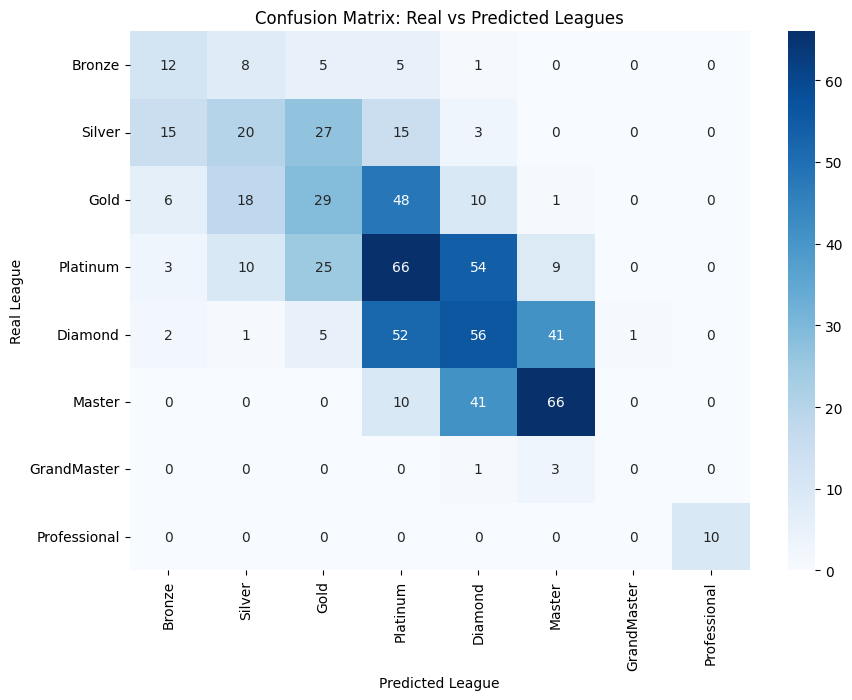

Accuracy: 0.38144329896907214
              precision    recall  f1-score   support

           0       0.32      0.39      0.35        31
           1       0.35      0.25      0.29        80
           2       0.32      0.26      0.29       112
           3       0.34      0.40      0.36       167
           4       0.34      0.35      0.35       158
           5       0.55      0.56      0.56       117
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00        10

    accuracy                           0.38       679
   macro avg       0.40      0.40      0.40       679
weighted avg       0.38      0.38      0.38       679



In [ ]:
# Import SimpleImputer to handle missing values
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an imputer to fill NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the training data
X_train = imputer.fit_transform(X_train)

# Also apply the imputer to the test data
X_test = imputer.transform(X_test)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluation function
def evaluate_model(model, X_test, y_test):
    """Evaluates the model and plots confusion matrix."""
    # Make predictions
    y_pred = model.predict(X_test)

    # Map league labels to league names
    league_mapping = {
        0: 'Bronze', 1: 'Silver', 2: 'Gold', 3: 'Platinum',
        4: 'Diamond', 5: 'Master', 6: 'GrandMaster', 7: 'Professional'
    }

    # Convert predictions and real values to league names
    y_test_leagues = [league_mapping[league] for league in y_test]
    y_pred_leagues = [league_mapping[league] for league in y_pred]

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_leagues, y_pred_leagues, labels=list(league_mapping.values()))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(league_mapping.values()), yticklabels=list(league_mapping.values()))
    plt.xlabel('Predicted League')
    plt.ylabel('Real League')
    plt.title('Confusion Matrix: Real vs Predicted Leagues')
    plt.show()

    # Print accuracy and classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Evaluate the Gradient Boosting model
evaluate_model(gb_model, X_test, y_test)

## 4.3 Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Function to tune the model using GridSearchCV
def tune_model(model, param_grid, X_train, y_train):
    """Tune the model using GridSearchCV and return the best model."""
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Define the parameter grid for tuning Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Impute missing values for X_train and X_test before tuning
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Perform hyperparameter tuning
best_gb_model = tune_model(GradientBoostingClassifier(random_state=42), param_grid, X_train_imputed, y_train)

# Evaluate the tuned Gradient Boosting model
evaluate_model(best_gb_model, X_test_imputed, y_test)

# Model: Naive Bayes Classifier

## 5.1 Model Training

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# Create an imputer object to handle missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values for X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define the function to train the model
def train_model(model, X_train, y_train):
    """Train a given model on the training data."""
    model.fit(X_train, y_train)
    return model

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model = train_model(nb_model, X_train_imputed, y_train)

## 5.2 Model Evaluation

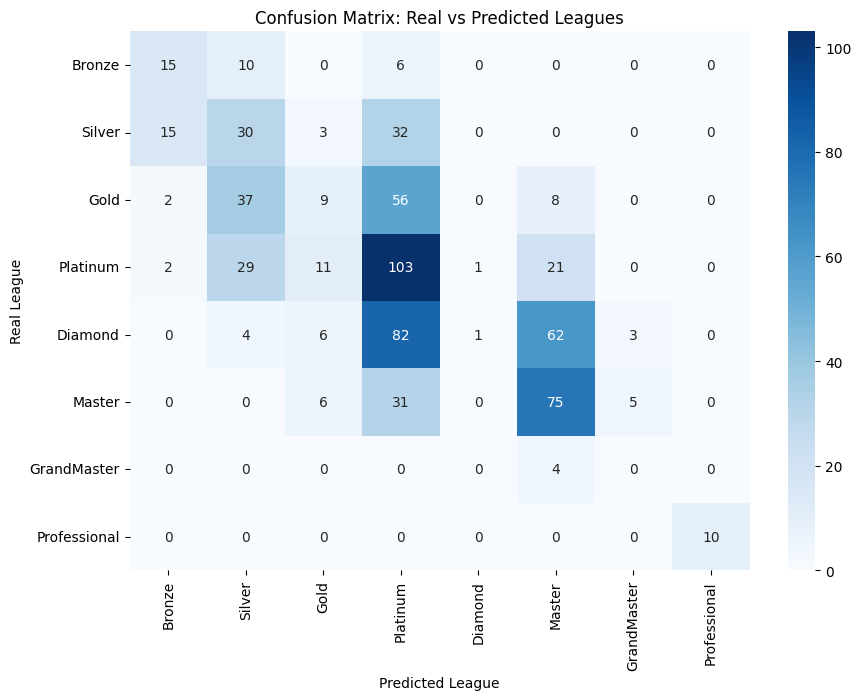

Accuracy: 0.35787923416789397
              precision    recall  f1-score   support

           0       0.44      0.48      0.46        31
           1       0.27      0.38      0.32        80
           2       0.26      0.08      0.12       112
           3       0.33      0.62      0.43       167
           4       0.50      0.01      0.01       158
           5       0.44      0.64      0.52       117
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00        10

    accuracy                           0.36       679
   macro avg       0.41      0.40      0.36       679
weighted avg       0.38      0.36      0.29       679



In [ ]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation function
def evaluate_model(model, X_test, y_test):
    """Evaluates the model and plots confusion matrix."""
    # Make predictions
    y_pred = model.predict(X_test)

    # Map league labels to league names
    league_mapping = {
        0: 'Bronze', 1: 'Silver', 2: 'Gold', 3: 'Platinum',
        4: 'Diamond', 5: 'Master', 6: 'GrandMaster', 7: 'Professional'
    }

    # Convert predictions and real values to league names
    y_test_leagues = [league_mapping[league] for league in y_test]
    y_pred_leagues = [league_mapping[league] for league in y_pred]

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_leagues, y_pred_leagues, labels=list(league_mapping.values()))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(league_mapping.values()), yticklabels=list(league_mapping.values()))
    plt.xlabel('Predicted League')
    plt.ylabel('Real League')
    plt.title('Confusion Matrix: Real vs Predicted Leagues')
    plt.show()

    # Print accuracy and classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Evaluate the Naive Bayes model
evaluate_model(nb_model, X_test_imputed, y_test)

# Comparative Visualization

Accuracy for Random Forest: 0.42
Accuracy for Decision Tree: 0.32
Accuracy for Gradient Boosting: 0.38
Accuracy for Naive Bayes: 0.36


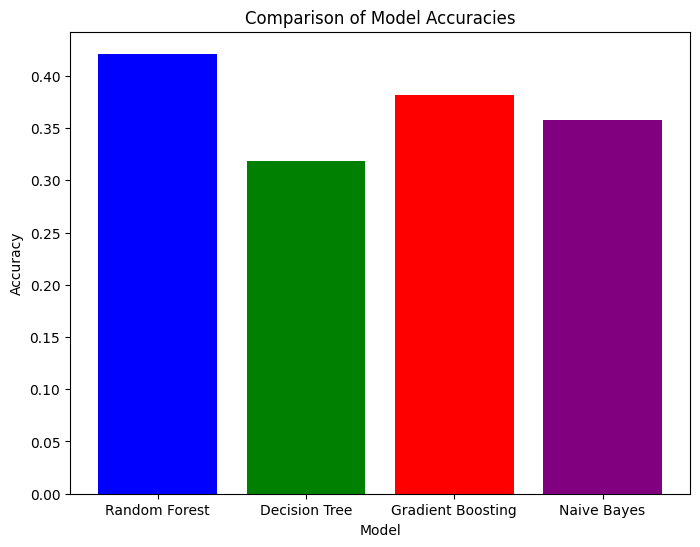

In [ ]:
# Necessary Imports
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Define Model Training Function
def train_model(model, X_train, y_train):
    """Train a given model on the training data."""
    model.fit(X_train, y_train)
    return model

# Define Model Evaluation Function
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluates the model and returns accuracy."""
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")

    return accuracy

# Function to compare models
def compare_models(X_train, X_test, y_train, y_test):
    """Train, evaluate, and compare models using accuracy."""

    # Train and evaluate Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model = train_model(rf_model, X_train, y_train)
    rf_accuracy = evaluate_model(rf_model, X_test, y_test, "Random Forest")

    # Train and evaluate Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model = train_model(dt_model, X_train, y_train)
    dt_accuracy = evaluate_model(dt_model, X_test, y_test, "Decision Tree")

    # Train and evaluate Gradient Boosting
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model = train_model(gb_model, X_train, y_train)
    gb_accuracy = evaluate_model(gb_model, X_test, y_test, "Gradient Boosting")

    # Train and evaluate Naive Bayes
    nb_model = GaussianNB()
    nb_model = train_model(nb_model, X_train, y_train)
    nb_accuracy = evaluate_model(nb_model, X_test, y_test, "Naive Bayes")

    # Comparison Bar Plot
    models = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Naive Bayes']
    accuracies = [rf_accuracy, dt_accuracy, gb_accuracy, nb_accuracy]

    plt.figure(figsize=(8, 6))
    plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Model Accuracies')
    plt.show()

# Example use of the function
compare_models(X_train_imputed, X_test_imputed, y_train, y_test)